In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

In [9]:
data.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

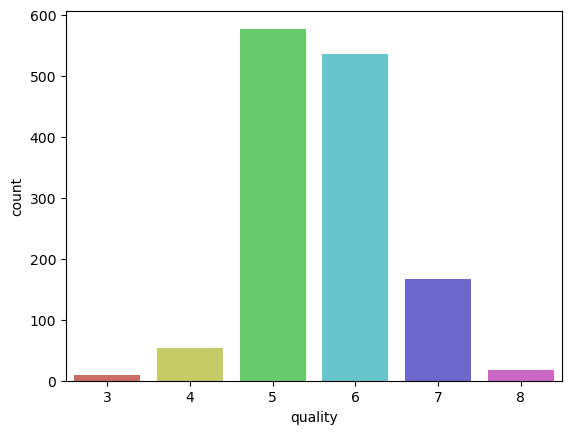

In [10]:
sns.countplot(x=data.quality, palette='hls')
plt.show()

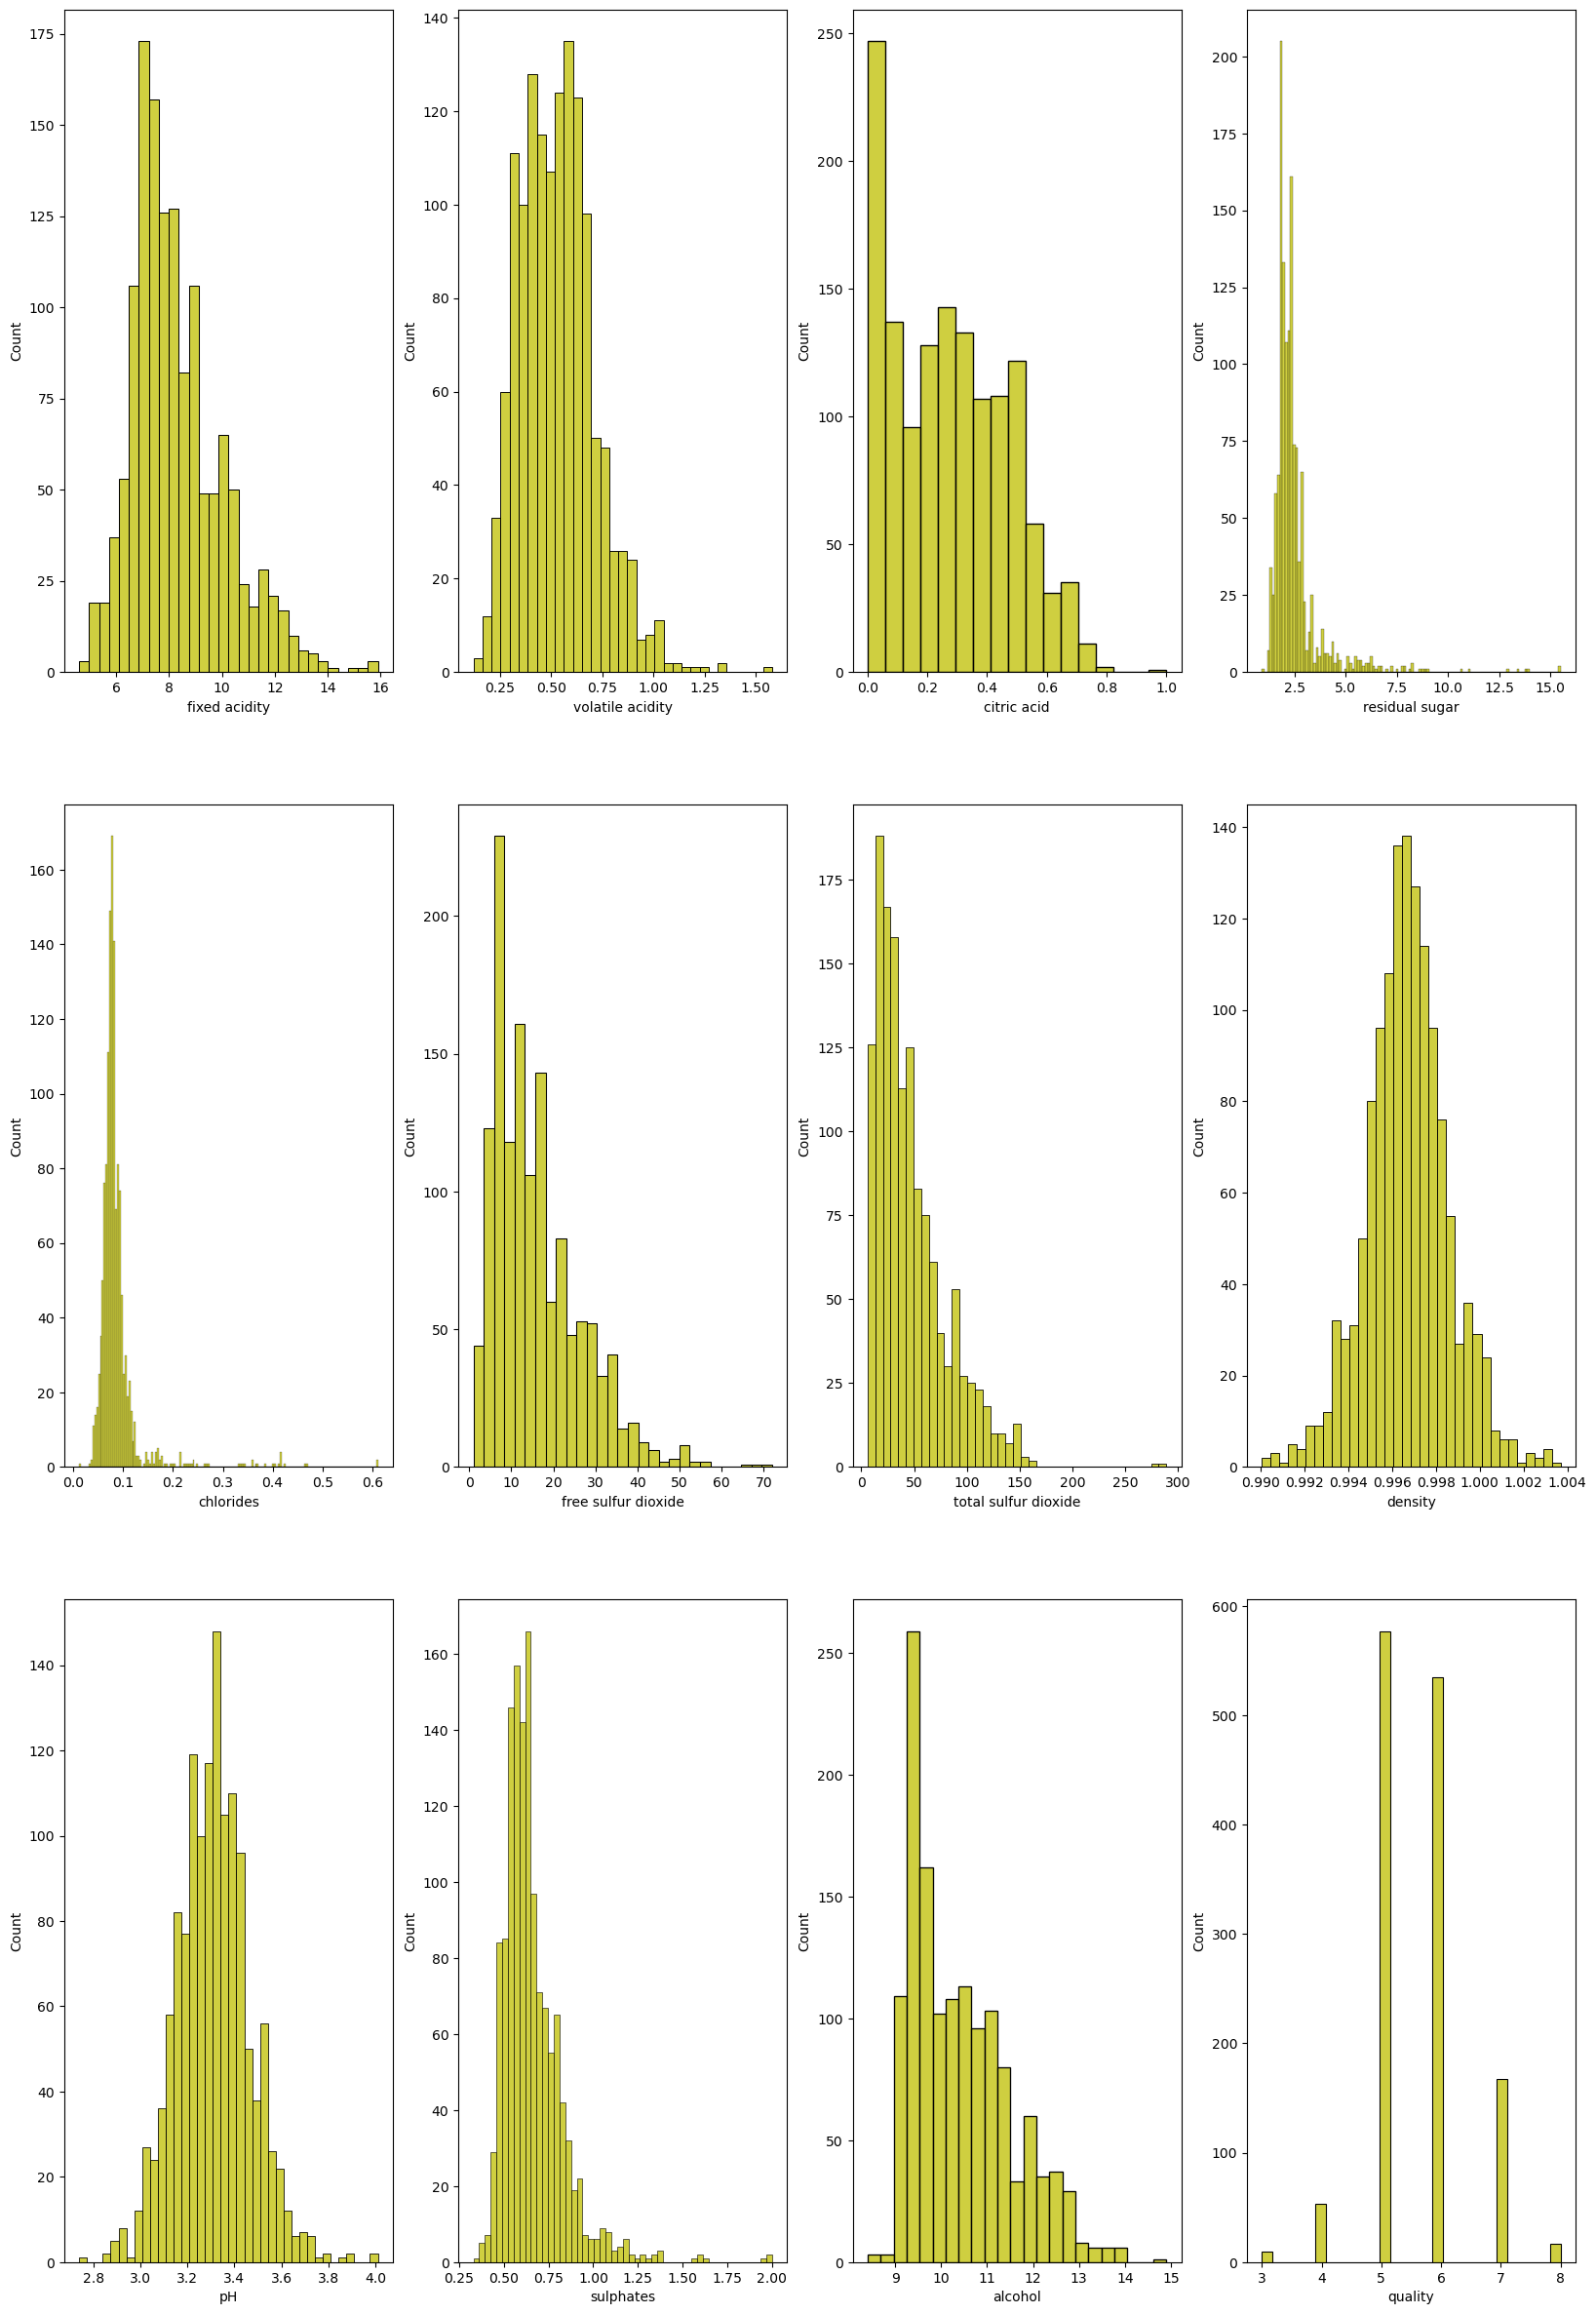

In [11]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(20,30))
k = 0
columns = list(data.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(data[columns[k]], ax = ax1[i][j], color = 'y')
            k += 1
plt.show()

In [12]:
# apply log transform on the columns
data['residual sugar'] = np.log(data['residual sugar'])
data['chlorides'] = np.log(data['chlorides'])
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])
data['sulphates'] = np.log(data['sulphates'])

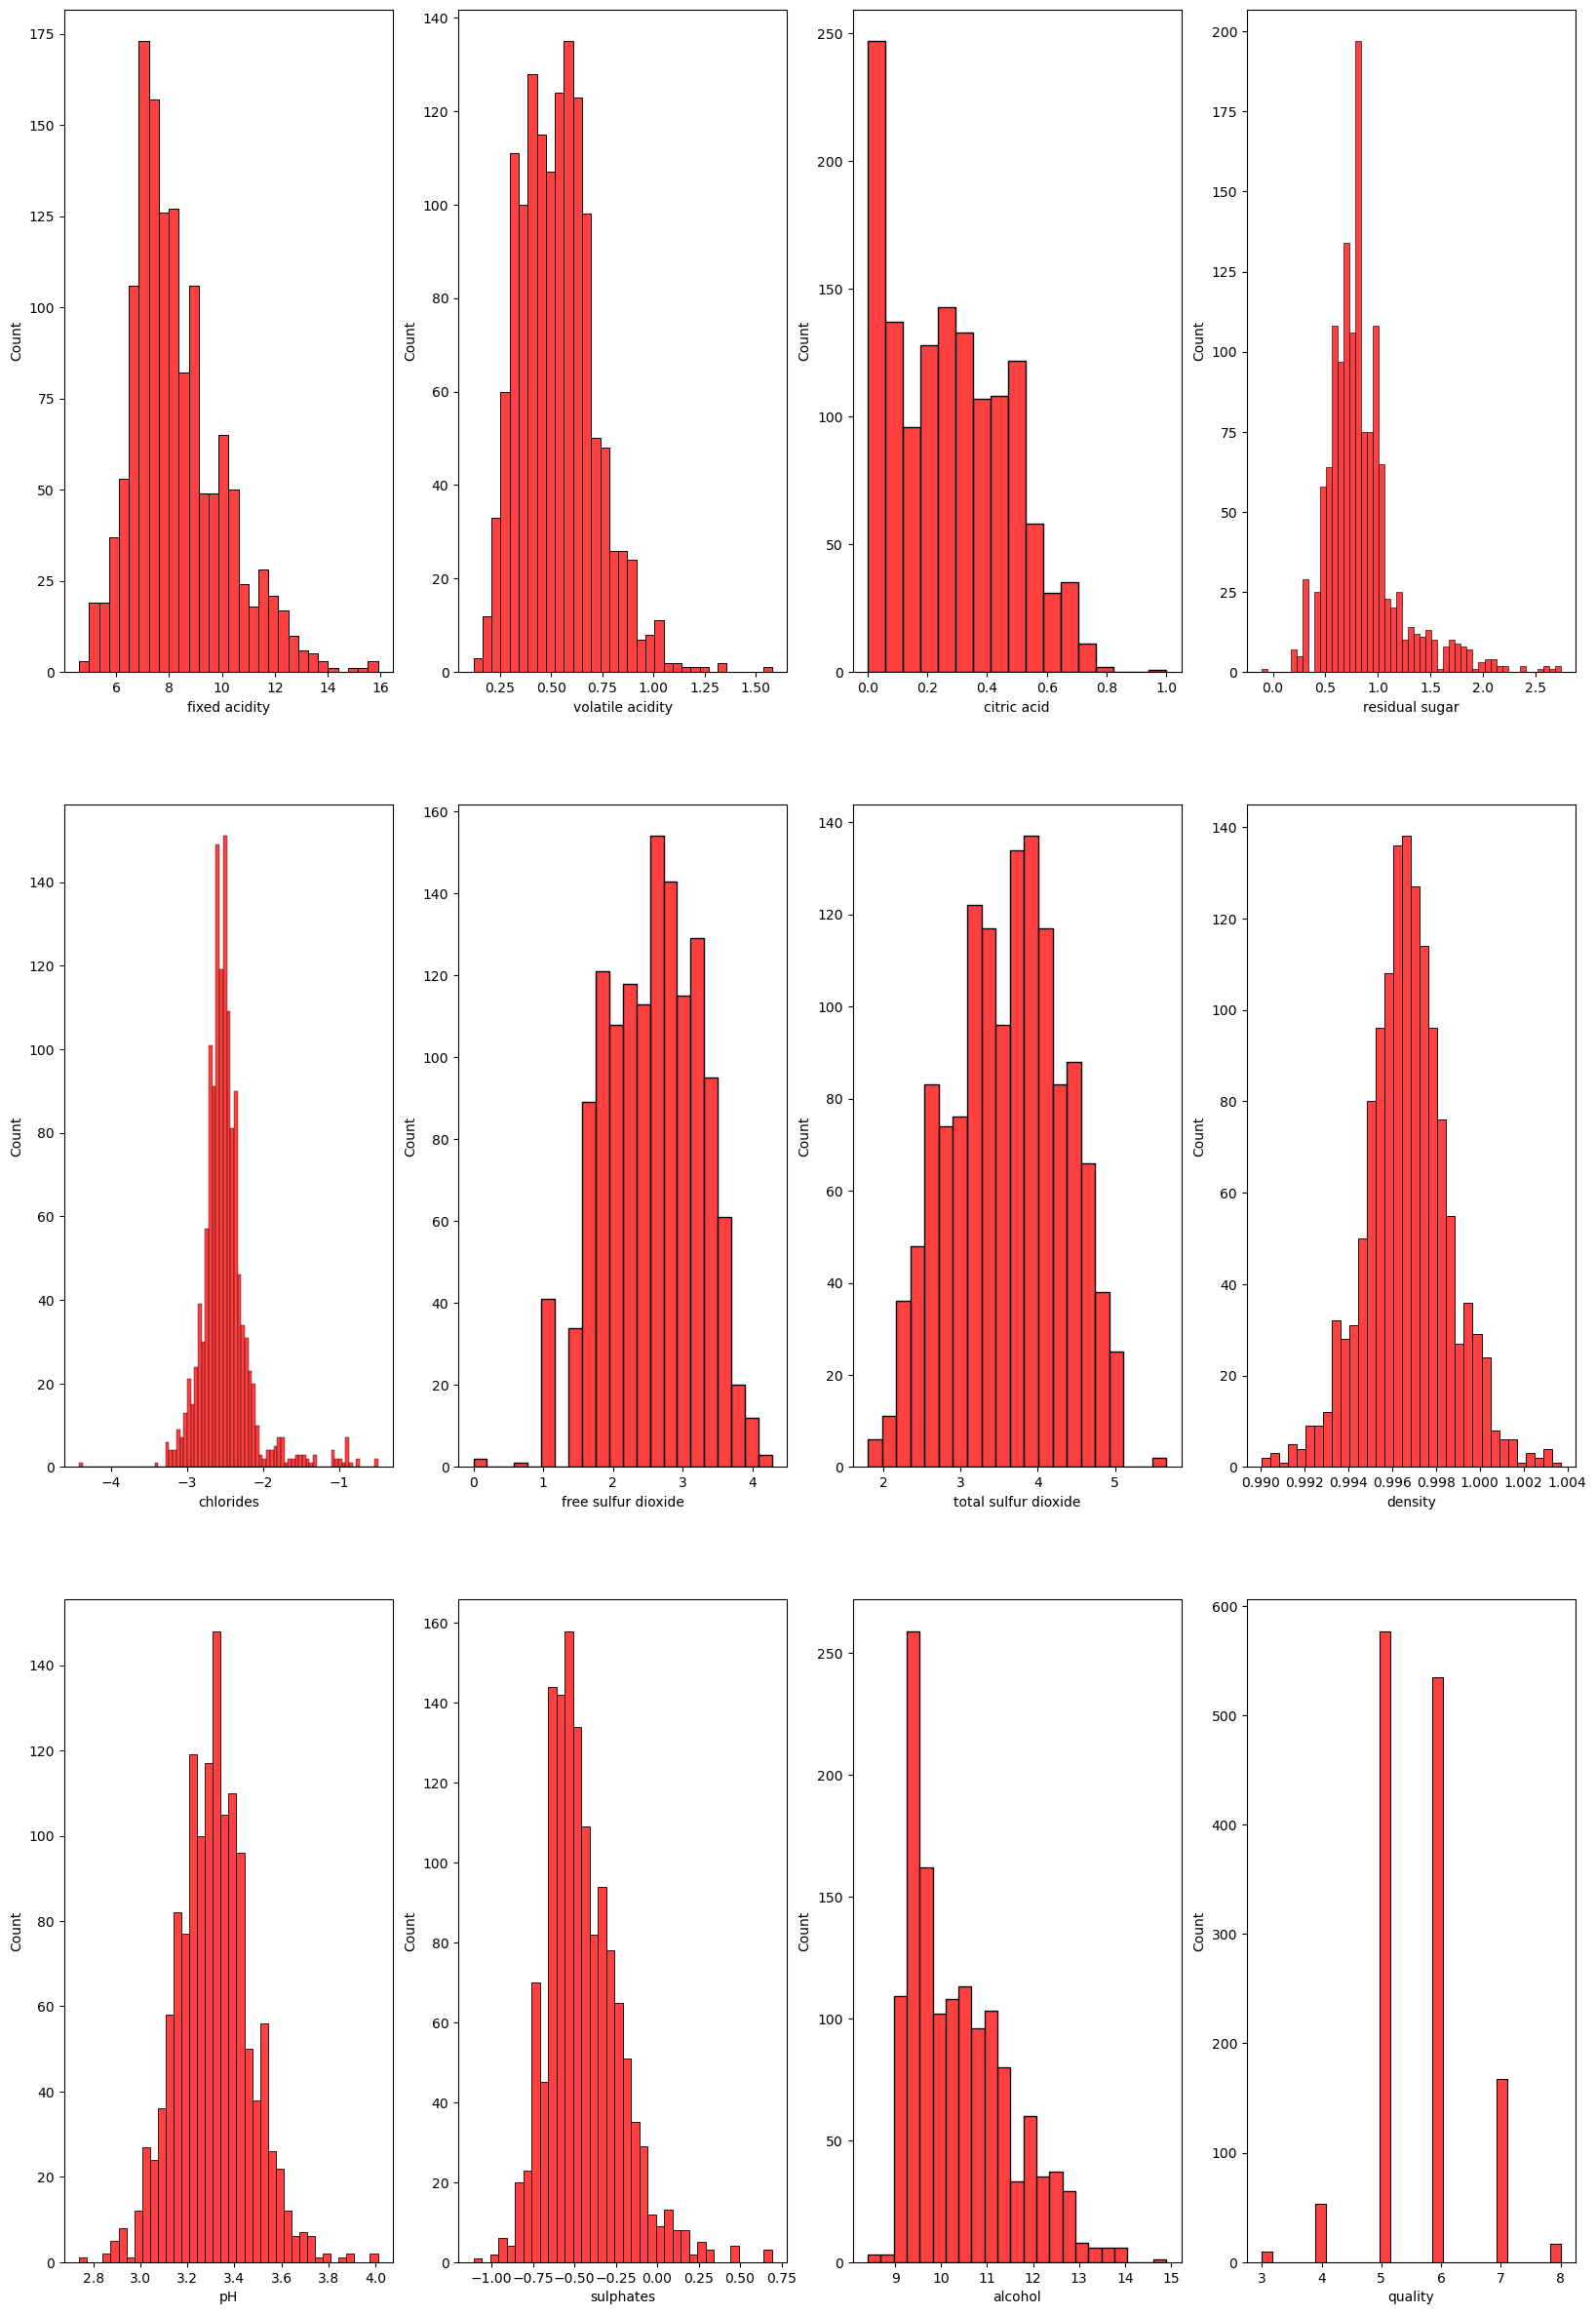

In [13]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(20,30))
k = 0
columns = list(data.columns)
for i in range(3):
    for j in range(4):
            sns.histplot(data[columns[k]], ax = ax1[i][j], color = 'r')
            k += 1
plt.show()

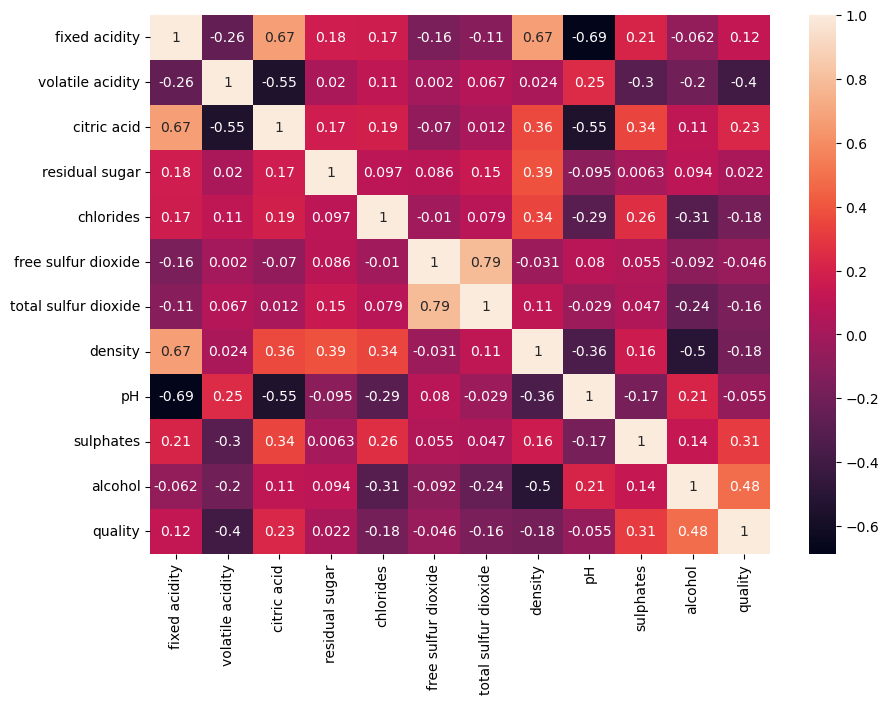

In [14]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot=True, cmap='rocket')
plt.show()

In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


In [16]:
# separate independent features
X = data.drop('quality',axis='columns')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
5,7.4,0.66,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4


In [17]:
# dependent features

# y = data.quality

y=data['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

In [19]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

print("After SMOTE: ", Counter(y_resampled))

After SMOTE:  Counter({4: 461, 7: 461, 6: 461, 5: 461, 8: 461, 3: 461})


## Apply Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(X_resampled,y_resampled)

LogisticRegression()

In [22]:
LR_pred = model_LogReg.predict(X_test)
from sklearn.metrics import accuracy_score
LR_acc = accuracy_score(y_test,LR_pred)
print("Accuracy of Logistic Regression: ",round(LR_acc*100))

Accuracy of Logistic Regression:  39


## Apply Support Vector Classifier

In [23]:
from sklearn.svm import SVC
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [24]:
SVC_pred = model_SVC.predict(X_test)
from sklearn.metrics import accuracy_score
SVC_acc = accuracy_score(y_test,SVC_pred)
print("Accuracy of Support Vector Classifier: ",round(SVC_acc*100))

Accuracy of Support Vector Classifier:  36


## Apply Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_resampled,y_resampled) 

DecisionTreeClassifier()

In [26]:
DT_pred = model_DT.predict(X_test)
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_test,DT_pred)
print("Accuracy of Decision Tree Classifier: ",round(DT_acc*100))

Accuracy of Decision Tree Classifier:  44


## Apply Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_resampled,y_resampled) 

RandomForestClassifier()

In [28]:
RF_pred = model_RF.predict(X_test)
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,RF_pred)
print("Accuracy of Random Forest Classifier: ",round(RF_acc*100))

Accuracy of Random Forest Classifier:  58


## Apply KNeighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model_KN = RandomForestClassifier()
model_KN.fit(X_resampled,y_resampled)


RandomForestClassifier()

In [30]:
KN_pred = model_KN.predict(X_test)
from sklearn.metrics import accuracy_score
KN_acc = accuracy_score(y_test,KN_pred)
print("Accuracy of KNeighbors Classifier: ",round(KN_acc*100))

Accuracy of KNeighbors Classifier:  56


<Axes: >

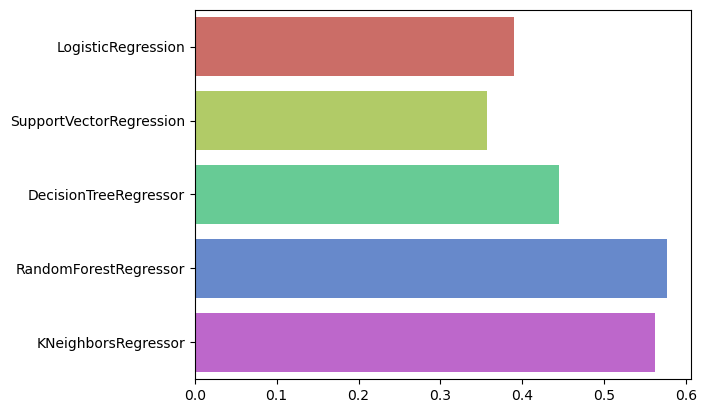

In [31]:
Accuracy = [LR_acc,SVC_acc,DT_acc,RF_acc,KN_acc]
model_names=["LogisticRegression","SupportVectorRegression","DecisionTreeRegressor","RandomForestRegressor","KNeighborsRegressor"]
sns.barplot(x=Accuracy,y=model_names, palette="hls")

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,RF_pred)
cm

array([[ 1,  0,  2,  0,  0,  0],
       [ 0,  6,  5,  1,  0,  0],
       [ 2,  4, 78, 25,  7,  0],
       [ 0,  3, 22, 53, 28,  2],
       [ 0,  0,  1,  9, 17,  2],
       [ 0,  0,  0,  0,  2,  2]])

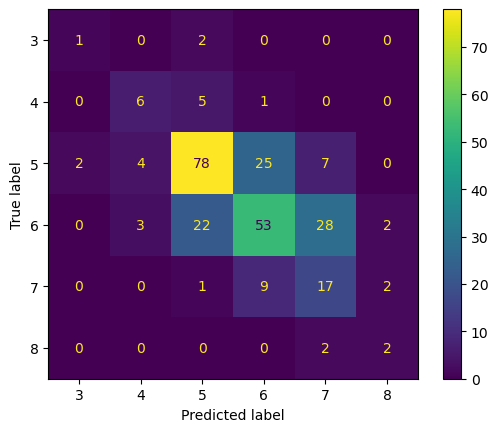

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_disp = ConfusionMatrixDisplay(cm, display_labels=model_RF.classes_)
cm_disp.plot()
plt.show()

## Save Scaler and Model Parameters

In [34]:
import pickle

# save scaler parameters
file_name = 'New_scaler.pkl'
pickle.dump(scaler, open(file_name,'wb'))

# model parameters
file_name = 'New_RFmodel.pkl'
pickle.dump(model_RF, open(file_name,'wb'))

In [35]:
import numpy as np
import pickle

# load saved model and scaler
with open("New_RFmodel.pkl","rb") as f:
    model = pickle.load(f)

with open("New_scaler.pkl","rb") as f:
    scaler = pickle.load(f)

# List of feature names in correct order
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# collect input from user
print("Enter the following details for prediction: ")
user_values = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: "))
    user_values.append(val)

# convert to array and reshape
input_data = np.array(user_values).reshape(1,-1)

# scale using the fitted scaler
scaled_data = scaler.transform(input_data)

# predict
prediction = model.predict(scaled_data)

print(f"\nPredicted Wine Quality: {prediction[0]}")

Enter the following details for prediction: 

Predicted Wine Quality: 6


---

## <center>THANK YOU</center>

---